**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [1]:
import keras
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Data Preprocessing

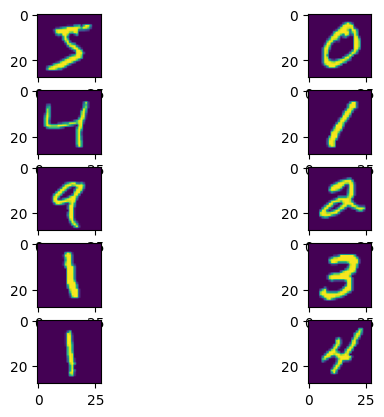

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.subplot(5,2,i+1)
  plt.imshow(x_train[i])

# Build CNN Model

In [4]:
x_train /= 255
x_test /=255

'''
Define batch size of 64 , 
No of classes (interpret from data)
Train for 5 epochs
'''

batch_size = 64
epochs = 5
num_classes = 10

def build_model(optimizer):
    
    '''
      Define a sequential model with categorical cross entropy as loss function consisting
      2 convolution and 2 pooling layers with relu as activation function followed by
      droput -> flatten -> dense -> dropout -> dense
    
      Convolution layer - (kernel size = (3*3))
      Pooling layer - (pool size = (2*2))
    '''
    model = Sequential()
    model.add(Conv2D(32,kernel_size = (3,3),activation='relu',input_shape = input_shape))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(64,kernel_size = (3,3),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))

    model.compile(loss = keras.losses.categorical_crossentropy, optimizer=optimizer,metrics=['accuracy'])
    model.summary()

    return model

optimizers = ['adam','adagrad']
history_dict = {}

for i in optimizers:
    print(f"Training with {i} optimizer")
    model = build_model(i)
    hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test)) 
    keras.models.save_model(model,f"digit_mnist_{i}.keras",save_format = "keras")
    history_dict[i] = hist.history

Training with adam optimizer


E:\INSTALLATIONS\MINICONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 611,466 (2.33 MB)

 Trainable params: 611,466 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8663 - loss: 0.4185 - val_accuracy: 0.9859 - val_loss: 0.0425
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9791 - loss: 0.0690 - val_accuracy: 0.9890 - val_loss: 0.0342
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9844 - loss: 0.0493 - val_accuracy: 0.9912 - val_loss: 0.0268
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9879 - loss: 0.0403 - val_accuracy: 0.9921 - val_loss: 0.0242
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9895 - loss: 0.0337 - val_accuracy: 0.9920 - val_loss: 0.0232


Training with adagrad optimizer


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 611,466 (2.33 MB)

 Trainable params: 611,466 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.2393 - loss: 2.1773 - val_accuracy: 0.7988 - val_loss: 1.1080
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.6587 - loss: 1.1088 - val_accuracy: 0.8730 - val_loss: 0.5099
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.7814 - loss: 0.6971 - val_accuracy: 0.9018 - val_loss: 0.3833
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.8223 - loss: 0.5662 - val_accuracy: 0.9151 - val_loss: 0.3206
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8516 - loss: 0.4839 - val_accuracy: 0.9239 - val_loss: 0.2835


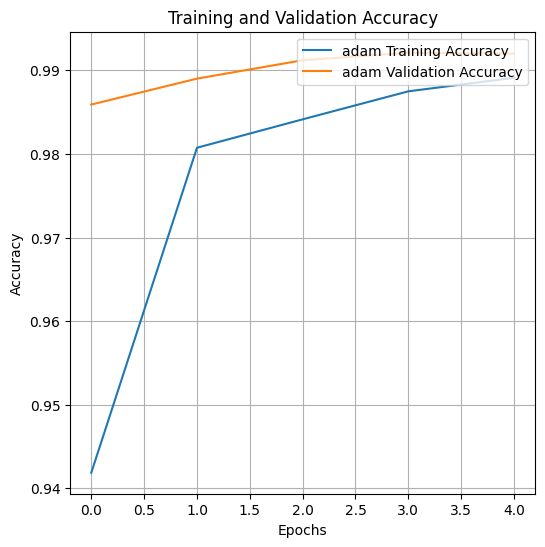

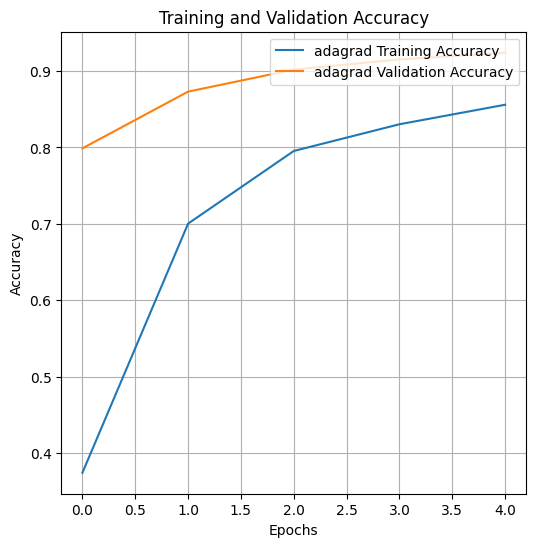

In [10]:
for i in optimizers:
    plt.figure(figsize=(6,6))
    plt.plot(history_dict[i]['accuracy'], label = f"{i} Training Accuracy")
    plt.plot(history_dict[i]['val_accuracy'], label = f"{i} Validation Accuracy")

    plt.title("Training and Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.grid('True')
    plt.show()

# Predict Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Class 1


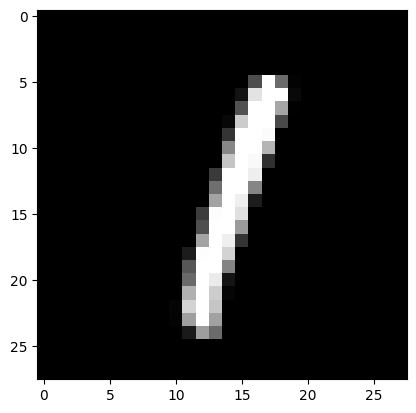

In [12]:
def predict_image(model, img):
    img = img.reshape(1,28,28)
    img = img.astype('float32')
    img /= 255
    pred = model.predict(img)
    ans = np.argmax(pred)
    print("Predicted Class",ans)


m = load_model('digit_mnist_adam.keras')
predict_image(m, x_test[5])
plt.imshow(x_test[5],cmap='gray')